<div style="background-color:Brown;color:red;padding:20px;border:1px solid brown;text-align:center;">
<p><font size="14" color=white face="Lora"><i> Medical Insurance Cost Prediction </i></font> </p>
</div>

## Problem statement

> Predict the future medical expenses of subjects based on certain features building a robust machine learning model.

### Step 1: Load the data and perform the basic EDA to understand the data.

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data set
data = pd.read_csv(r'D:\Data\insurance.csv')

In [3]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Dataset consists of 1338 records. Each record contains the below data for specific person.
```
age – Age of the person
sex – Sex of the person
bmi – Body Mass Index(BMI) of the person
children – Number of children for the person
smoker – Smoking status of the person
region – Region of the person in US
charges – Medical Insurance costs per year for the person
```

In [4]:
data.shape
data.info()
data.describe()

(1338, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [7]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data.drop_duplicates(keep='first',inplace=True)

In [9]:
data.reset_index(inplace=True)

In [10]:
data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
data.drop(['index'],axis=1,inplace=True)

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


#### Check for Outliers
**Skewness:**

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.
```
Less than -1 or greater than 1, then the distribution is highly skewed.
Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
Between -0.5 and 0.5, then the distribution is approx. symmetric.
When skewness = 0, then the data is perfrctly symmetric.
```

In [13]:
# check for the Skewness to see if there are any presence of outliers:
data.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

**From the Skewness it is clear that feature charges is having a skewness of 1.51 hence it is clear that it has outliers**

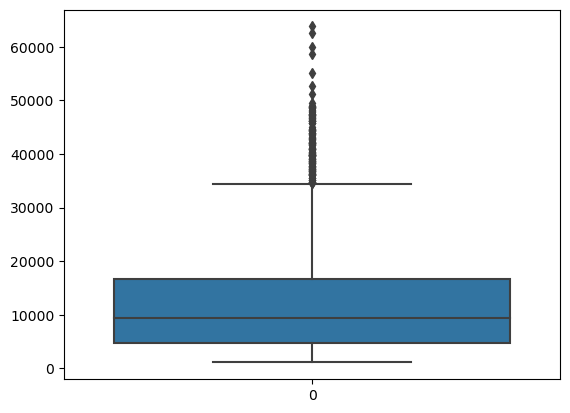

In [14]:
sns.boxplot(data.charges);

Observation:
- As we have seen in the description data, the charge has very large standard deviation, that is a sign that this variable contains outliers.
- we can see the medical bills more than approximately 38000 can be considered as outliers. 
- But based on the medical insurance industry, it can still be normal. Plus we only have 1337 data in the dataset, it is not a good idea to drop all the outliers data.
- To make this issue impact less in our prediction, we can use tree-based models which are not sensitive about outliers later.

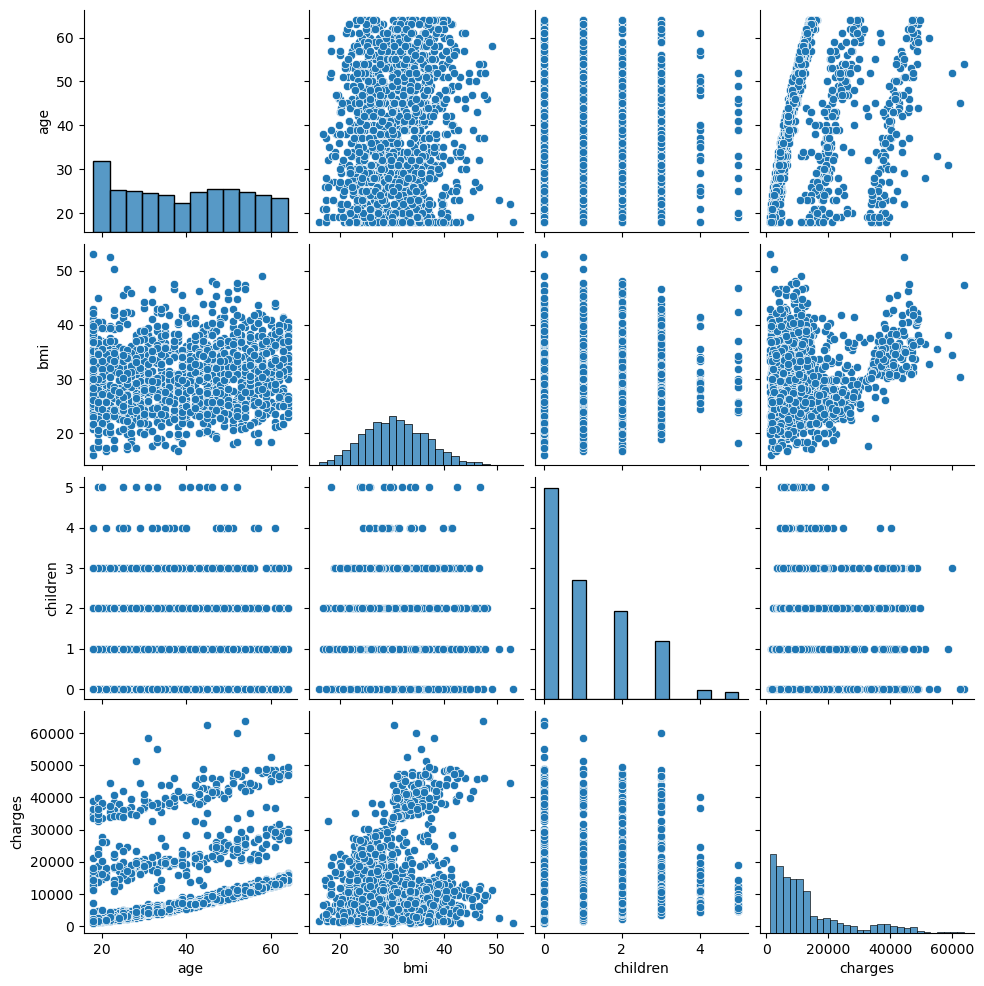

In [15]:
#Let's pull up a pairplot and get ideas of the relationship between charge and each variable.
sns.pairplot(data);

observation:
- In the pairplot, we can see `age` and `bmi` appear in some linear relationships with `charges`. 

Let's use more visualizations to find out more insights.

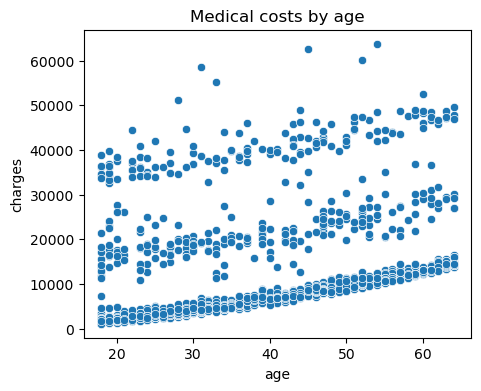

In [16]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x='age', y='charges')
plt.title("Medical costs by age")
plt.show();

observation:
- As we can see, whatever level of medical insurance the individuals have, when the individuals get older, the medical cost is increased. 

**How is BMI related to the medical cost?**


- According to Wikipedia: Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres.

- The BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height. Major adult BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more). When used to predict an individual's health, rather than as a statistical measurement for groups, the BMI has limitations that can make it less useful than some of the alternatives, especially when applied to individuals with abdominal obesity, short stature, or unusually high muscle mass.

- Source: https://en.wikipedia.org/wiki/Body_mass_index

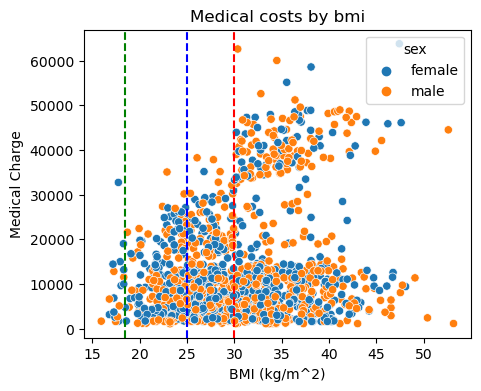

In [17]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex')
plt.axvline(x=18.5, color='green', linestyle = '--')  # under 18.5 - underweight, between 18.5~24.9 - Normal
plt.axvline(x=25, color = 'blue', linestyle = '--')  # between 25~29.9 - Overweight
plt.axvline(x=30, color = 'red', linestyle = '--')     # Over 30 - Obese
plt.title("Medical costs by bmi")
plt.xlabel("BMI (kg/m^2)")
plt.ylabel("Medical Charge")
plt.show();

In [18]:
# Group by BMI when individual pay more than $30000

bins_bmi = [data['bmi'].min(), 18.5, 25, 30, data['bmi'].max()]
charges_30k = data[data['charges']>30000]
charges_30k['bmi'].value_counts(bins=bins_bmi, sort=False).rename_axis('BMI Group').reset_index(name='Numbers of Individuals')

,BMI Group,Numbers of Individuals
0,"(15.959000000000001, 18.5]",1
1,"(18.5, 25.0]",2
2,"(25.0, 30.0]",10
3,"(30.0, 53.13]",149


In [19]:
# Individuals who have BMI over or equal to 50

data[data['bmi']>=50]

,age,sex,bmi,children,smoker,region,charges
846,23,male,50.38,1,no,southeast,2438.0552
1046,22,male,52.58,1,yes,southeast,44501.3982
1316,18,male,53.13,0,no,southeast,1163.4627


insights based on the three lines and additional discoveries:

1. **Obesity and medical bills:** Among individuals who pay medical bills over 30000, there is a higher proportion of obese individuals. However, not all obese individuals are required to pay large bills, as a significant number of them have medical bills less than 15000.

2. **Extreme BMI examples:** When examining individuals with BMI over 50 kg/m², there are notable variations in their medical bills. For instance, the highest BMI individual in the dataset has a medical bill as low as 1163, while another individual with the same extreme BMI has a medical bill as high as 44501. Notably, the individual with the highest bill is a smoker, highlighting the influence of smoking on medical expenses.

3. **Other medical concerns and high medical bills:** Despite having extremely high BMIs, the top five individuals with the highest medical bills have BMI values between 30-40 kg/m². This suggests that these individuals may have additional medical concerns beyond those directly caused by their body mass.

4. **Underweight, normal weight, and overweight comparisons:** The group of underweight individuals tends to have the lowest medical bills compared to other BMI groups. As BMI increases, even within the range of normal BMI, medical bills are likely to increase as well.

In summary, the insights gained from the lines and additional observations highlight the complex relationship between BMI and medical bills. While obesity is generally associated with higher bills, other factors such as smoking and additional medical concerns can significantly impact expenses. Moreover, underweight individuals tend to have the lowest bills, and as BMI increases, medical expenses tend to rise, even within the normal BMI range.

**Do smokers pay more than non-smokers?**

It seems like a concern for all of the insurance companies

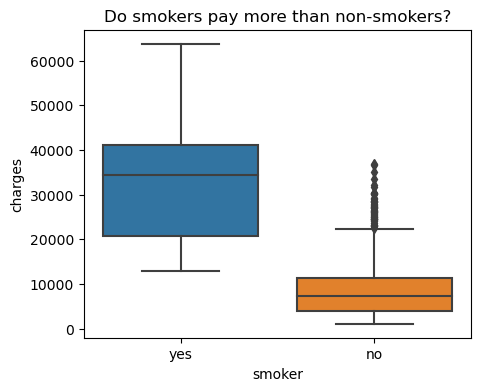

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(data=data, x='smoker',y='charges')
plt.title("Do smokers pay more than non-smokers?")
plt.show();

- This box plot gives us a very clear trend that the smokers are likely to pay more than the non-smokers.
- But let's discover even more. Let's use the same scatter plot for BMI above, but compare by smoker instead of sex.

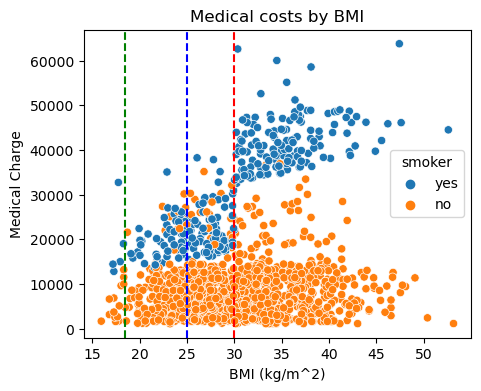

In [21]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')
plt.axvline(x=18.5, color='green', linestyle = '--')  # under 18.5 - underweight, between 18.5~24.9 - Normal
plt.axvline(x=25, color = 'blue', linestyle = '--')  # between 25~29.9 - Overweight
plt.axvline(x=30, color = 'red', linestyle = '--')     # Over 30 - Obese
plt.title("Medical costs by BMI")
plt.xlabel("BMI (kg/m^2)")
plt.ylabel("Medical Charge")
plt.show();

In [22]:
# Find out the minimum medical bills for smokers and non-smokers

data.groupby(['smoker'])['charges'].min()

smoker
no      1121.8739
yes    12829.4551
Name: charges, dtype: float64


1. **Obese non-smokers pay less:** Among obese individuals, there is a notable division in medical bills. Only a few obese non-smokers are required to pay more than 30000. This suggests that when individuals are overweight or obese, they are likely to pay less in medical bills if they do not smoke.

2. **Normal BMI non-smokers with higher bills:** Interestingly, there are non-smoking individuals with a normal BMI who have larger medical bills compared to other non-smokers with a normal BMI. This could be attributed to the presence of additional medical concerns unrelated to their body mass.

3. **No smokers with bills below 10000:** It is worth noting that none of the smokers in the dataset have medical bills lower than 10,000. The minimum medical bills for smokers are around 12829.

4. **Increased medical bills for overweight and obese smokers:** Based on the data, it can be concluded that medical bills tend to increase significantly for smokers when they are overweight or obese.

In summary, the main findings are:

- Obese non-smokers generally pay less in medical bills.
- Normal BMI non-smokers with larger bills likely have other medical issues.
- Smokers have minimum bills of around 12829.
- Overweight and obese smokers experience a significant increase in medical bills.



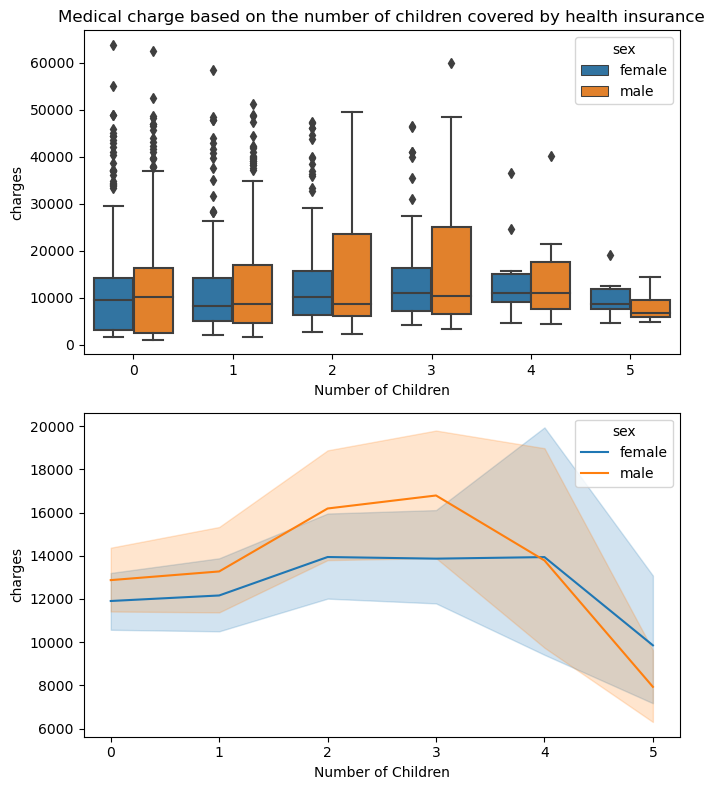

In [23]:
fig, axes = plt.subplots(2, 1, figsize = (7,8))

sns.boxplot(data=data, x='children', y='charges', hue='sex', ax = axes[0])
axes[0].set_title("Medical charge based on the number of children covered by health insurance")
axes[0].set_xlabel("Number of Children")

sns.lineplot(data=data, x='children', y='charges', hue='sex', ax = axes[1])
axes[1].set_xlabel("Number of Children")

plt.tight_layout()
plt.show();

In [24]:
data.groupby(['sex'])['charges'].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

here are the key observations regarding the number of children and their impact on average medical bills, as well as the differences based on gender:

1. **Number of children and average medical bills:** Individuals with three children tend to have the highest average medical bills compared to those with a different number of children. On the other hand, individuals with five children tend to have the lowest average medical bills. This suggests that the number of children has an influence on medical expenses.

2. **Effect of number of children on medical bills based on gender:** The impact of the number of children on medical bills differs based on the gender of the applicants.

   - Female applicants with less than four children tend to have lower medical bills than male applicants, regardless of whether or not they have children as dependents.
   
   - However, once female applicants have four or more children, their medical bills start to exceed those of male applicants. This indicates that the number of children becomes a significant factor in determining higher medical expenses for female applicants.

These findings suggest that the relationship between the number of children and medical bills is complex, and it is further influenced by the gender of the applicants.

In [25]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

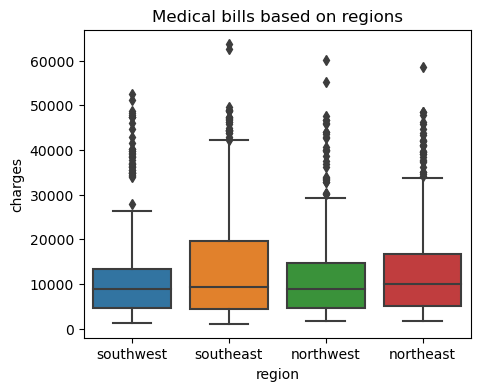

In [26]:
plt.figure(figsize=(5,4))
sns.boxplot(data=data, x='region', y='charges')
plt.title("Medical bills based on regions")
plt.show();

- They look very similar to each other, the southeast tends to have a little more medical bills than the other.

--------

# Data Preparation
- Train Test Split
- Encoding for Categorical Columns
  - Ordinal : LabelEncoding or OrdinalEncoding
  - Nominal : OneHotEncoding or get_dummies
- Encoding for Numerical Columns
  - Standardization (z-transformation)
  
#### We will be following below mentioned steps:
***
```
a. Identify the Target Variable and Splitting the Data into train and test
b. Separating Categorical and Numerical Columns
c. Rescaling Numerical Columns (Standardization or z-transformation)
d. Applying OneHotEncoding on Categorical Columns
e. Applying Label Encoding on Categorical Columns
f. Concatinating the Encoded Categorical Features and Scaled Numerical Features
```
***

# a. Identify the Target Variable and Splitting the Data into Train a

In [27]:
import sklearn

print(sklearn.__version__)


1.2.1


In [28]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
# Identifying the inputs (X) and output (y)

y = data['charges']
X = data.drop(['charges'], axis=1)

In [30]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [31]:
X_train.head()

,age,sex,bmi,children,smoker,region
999,30,male,22.990,2,yes,northwest
884,32,male,28.930,1,yes,southeast
517,45,male,30.495,2,no,northwest
1131,57,male,40.280,0,no,northeast
1187,43,female,25.270,1,yes,northeast


In [32]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


# b. Separating Categorical and Numerical Columns:

In [33]:
X_train.head()

,age,sex,bmi,children,smoker,region
999,30,male,22.990,2,yes,northwest
884,32,male,28.930,1,yes,southeast
517,45,male,30.495,2,no,northwest
1131,57,male,40.280,0,no,northeast
1187,43,female,25.270,1,yes,northeast


In [34]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [35]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
999,male,yes,northwest
884,male,yes,southeast
517,male,no,northwest
1131,male,no,northeast
1187,female,yes,northeast


In [36]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
999,30,22.990,2
884,32,28.930,1
517,45,30.495,2
1131,57,40.280,0
1187,43,25.270,1


# c. Scaling the Numerical Features

In [37]:
X_train_num.head()

,age,bmi,children
999,30,22.990,2
884,32,28.930,1
517,45,30.495,2
1131,57,40.280,0
1187,43,25.270,1


In [38]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
999,-0.644567,-1.234380,0.785181
884,-0.502636,-0.267219,-0.065361
517,0.419914,-0.012403,0.785181
1131,1.271498,1.580808,-0.915903
1187,0.277983,-0.863146,-0.065361


In [39]:
X_train_num.describe()

,age,bmi,children
count,1002.000000,1002.000000,1002.000000
mean,39.082834,30.571173,1.076846
std,14.098417,6.144754,1.176307
min,18.000000,15.960000,0.000000
25%,26.000000,26.083750,0.000000
50%,39.000000,30.300000,1.000000
75%,51.000000,34.800000,2.000000
max,64.000000,53.130000,5.000000


In [40]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.08283433 30.57117265  1.07684631]
Std of each column: [14.09138002  6.14168693  1.17572029]


In [41]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


# d. Applying OneHotEncoding on Categorical Columns

In [42]:
X_train_cat['sex'].value_counts(normalize=True)

male      0.505988
female    0.494012
Name: sex, dtype: float64

In [43]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.790419
yes    0.209581
Name: smoker, dtype: float64

In [44]:
X_train_cat['region'].value_counts(normalize=True)

southeast    0.270459
southwest    0.250499
northeast    0.240519
northwest    0.238523
Name: region, dtype: float64

In [45]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
999,1.0,1.0,1.0,0.0,0.0
884,1.0,1.0,0.0,1.0,0.0
517,1.0,0.0,1.0,0.0,0.0
1131,1.0,0.0,0.0,0.0,0.0
1187,0.0,1.0,0.0,0.0,0.0


# e. Applying Label Encoding on Categorical Columns

In [46]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
999
884
517
1131
1187


In [47]:
X_train_cat.sex.unique()

array(['male', 'female'], dtype=object)

In [48]:
sex_encoder = {'male' : 1, 'female' : 2}

X_train_cat_le['sex'] = X_train_cat['sex'].apply(lambda x : sex_encoder[x])

X_train_cat_le.head()

,sex
999,1
884,1
517,1
1131,1
1187,2


In [49]:
X_train_cat.smoker.unique()

array(['yes', 'no'], dtype=object)

In [50]:
smoker_encoder = {'yes':0, 'no':1}

X_train_cat_le['smoker'] = X_train_cat['smoker'].apply(lambda x : smoker_encoder[x])

X_train_cat_le.head()

,sex,smoker
999,1,0
884,1,0
517,1,1
1131,1,1
1187,2,0


In [51]:
X_train_cat.region.unique()

array(['northwest', 'southeast', 'northeast', 'southwest'], dtype=object)

In [52]:
region_encoder = {'northwest':1, 'southeast':2, 'northeast':3, 'southwest':4}

X_train_cat_le['region'] = X_train_cat['region'].apply(lambda x : region_encoder[x])

X_train_cat_le.head()


,sex,smoker,region
999,1,0,1
884,1,0,2
517,1,1,1
1131,1,1,3
1187,2,0,3


## f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [53]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,age,bmi,children,sex,smoker,region
999,-0.644567,-1.234380,0.785181,1,0,1
884,-0.502636,-0.267219,-0.065361,1,0,2
517,0.419914,-0.012403,0.785181,1,1,1
1131,1.271498,1.580808,-0.915903,1,1,3
1187,0.277983,-0.863146,-0.065361,2,0,3


# g. Preparing Test Data

In [54]:
X_test.head()

,age,sex,bmi,children,smoker,region
12,23,male,34.400,0,no,southwest
306,28,female,27.500,2,no,southwest
318,44,female,27.645,0,no,northwest
815,24,female,24.225,0,no,northwest
157,18,male,25.175,0,yes,northeast


In [55]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 12 to 624
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [56]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
12,male,no,southwest
306,female,no,southwest
318,female,no,northwest
815,female,no,northwest
157,male,yes,northeast


In [57]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
12,23,34.400,0
306,28,27.500,2
318,44,27.645,0
815,24,24.225,0
157,18,25.175,0


In [58]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
12,-1.141324,0.623416,-0.915903
306,-0.786497,-0.500054,0.785181
318,0.348948,-0.476444,-0.915903
815,-1.070359,-1.033295,-0.915903
157,-1.496151,-0.878614,-0.915903


In [59]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
12
306
318
815
157


In [60]:
X_test_cat_le['sex'] = X_test_cat['sex'].apply(lambda x : sex_encoder[x])

X_test_cat_le['smoker'] = X_test_cat['smoker'].apply(lambda x : smoker_encoder[x])

X_test_cat_le['region'] = X_test_cat['region'].apply(lambda x : region_encoder[x])

X_test_cat_le.head()

,sex,smoker,region
12,1,1,4
306,2,1,4
318,2,1,1
815,2,1,1
157,1,0,3


In [61]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,age,bmi,children,sex,smoker,region
12,-1.141324,0.623416,-0.915903,1,1,4
306,-0.786497,-0.500054,0.785181,2,1,4
318,0.348948,-0.476444,-0.915903,2,1,1
815,-1.070359,-1.033295,-0.915903,2,1,1
157,-1.496151,-0.878614,-0.915903,1,0,3


# Training the Model

## Decision Tree Regression

In [145]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

**Residual Analysis on Training Data**

In [146]:
y_train_pred = regressor.predict(X_train_transformed)

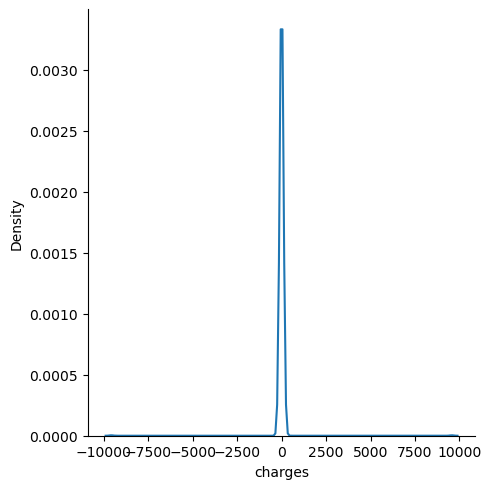

In [147]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

**Making the Prediction**

In [148]:
y_test_pred = regressor.predict(X_test_transformed)

In [149]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,1972.95000
306,20177.67113,4340.44090
318,7421.19455,7419.47790
815,2842.76075,22395.74424
157,15518.18025,16232.84700


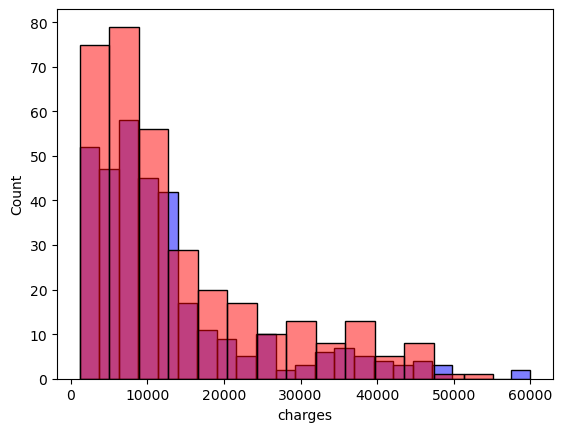

In [150]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [151]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3395.440119235821
Mean Squared Error:  46221947.31693999
Root Mean Squared Error:  6798.672467249764


**Evaluating the Model**

In [152]:
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
# Adjusted R^2
def Adjusted_r2(y_test,y_test_pred,X_test_transform):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_train)
    k = X_test_transform.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

In [155]:
y_train_pred = regressor.predict(X_train_transformed)
DT_tr_score = Adjusted_r2(y_train,y_train_pred,X_train_transformed)
print("Train Score:",DT_tr_score*100)

Train Score: 99.87949478350077


In [156]:
y_test_pred = regressor.predict(X_test_transformed)
DT_te_score = Adjusted_r2(y_test,y_test_pred,X_test_transformed)
DT_mse = mean_squared_error(y_test,y_test_pred)
print("Test Score:",DT_te_score*100)
print('MSE :',DT_mse ) 

Test Score: 63.69419974960029
MSE : 46221947.31693999


## Random Forest Regression

In [157]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

**Residual Analysis on Training Data**

In [158]:
y_train_pred = regressor.predict(X_train_transformed)

**Making the Prediction**

In [159]:
y_test_pred = regressor.predict(X_test_transformed)

In [160]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
12,1826.84300,4636.153617
306,20177.67113,4672.223423
318,7421.19455,14570.607725
815,2842.76075,9162.788340
157,15518.18025,16694.304205


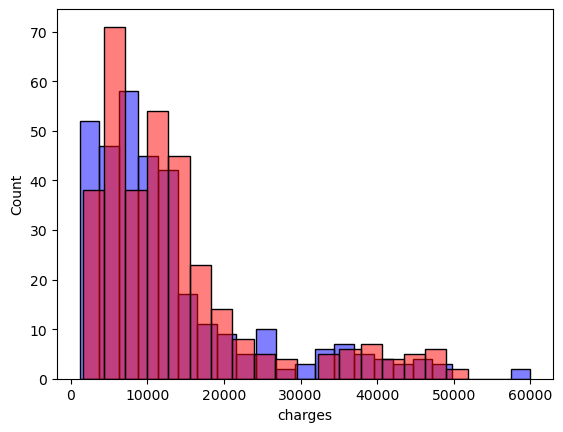

In [161]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [162]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2757.84493928597
Mean Squared Error:  21325796.944411993
Root Mean Squared Error:  4617.9862434195265


**Evaluating the Model**

In [163]:
y_train_pred = regressor.predict(X_train_transformed)
RF_tr_score = Adjusted_r2(y_train,y_train_pred,X_train_transformed)
print("Train Score:",RF_tr_score*100)

Train Score: 97.63967181423277


In [164]:
y_test_pred = regressor.predict(X_test_transformed)
RF_te_score = Adjusted_r2(y_test,y_test_pred,X_test_transformed)
RF_mse = mean_squared_error(y_test,y_test_pred)
print('MSE :',RF_mse )
print("Test Score:",RF_te_score*100)

MSE : 21325796.944411993
Test Score: 83.24929673050254


#### Hyperparameter tuning 

In [165]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [166]:
tuned_parameters = [{'max_depth' : [1,2,3,4,5,6,7,8,9]}]

regressor_RF = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
regressor_RF.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [167]:
print("Best parameters set found on train set")
print(regressor_RF.best_params_)
print(regressor_RF.best_estimator_)
print()
RF_Test_Score =  regressor_RF.score(X_test_transformed, y_test)*100
print('Score on Test Data: ',RF_Test_Score)

Best parameters set found on train set
{'max_depth': 4}
RandomForestRegressor(max_depth=4)

Score on Test Data:  87.66475241054124


## Gradient Boosting Decision Tree

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit (X_train_transformed, y_train)

GradientBoostingRegressor()

**Residual Analysis on Training Data**

In [169]:
y_train_pred = regressor.predict(X_train_transformed)

**Making the Prediction**

In [170]:
y_test_pred = regressor.predict(X_test_transformed)

In [171]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,3925.910767
306,20177.67113,6838.546567
318,7421.19455,9817.472221
815,2842.76075,6904.832003
157,15518.18025,15636.182231


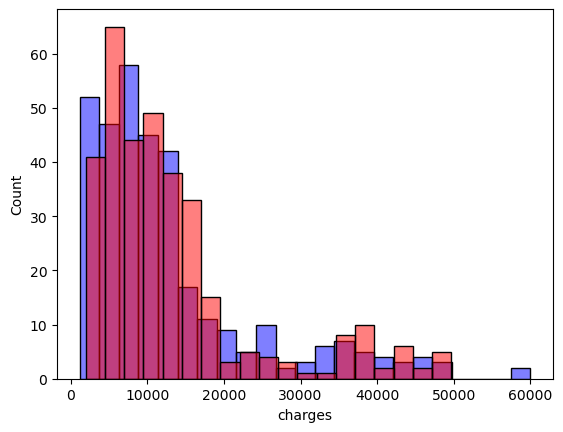

In [172]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [173]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2309.165088075318
Mean Squared Error:  15432242.42586125
Root Mean Squared Error:  3928.389291536832


**Evaluating the Model**

In [174]:
y_train_pred = regressor.predict(X_train_transformed)
GBDT_tr_score = Adjusted_r2(y_train,y_train_pred,X_train_transformed)
print("Train Score:",GBDT_tr_score*100)

Train Score: 89.89600537614899


In [175]:
GBDT_te_score = Adjusted_r2(y_test,y_test_pred,X_test_transformed)
GBDT_mse = mean_squared_error(y_test,y_test_pred)
print('MSE :',GBDT_mse )
print("Test Score:",GBDT_te_score*100)

MSE : 15432242.42586125
Test Score: 87.8784875269908


**Hyperparameter Tuning**

In [176]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import loguniform

In [177]:
#tuned_parameters = [{'max_depth' : [1,2,3,4,5,6,7,8,9]}]

hyperparameters = {
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'n_estimators'  : [50, 100, 200],
    'subsample'     : [0.1, 0.2, 0.5, 1.0],
    'max_depth'     : [2, 3, 4, 5]
}
regressor_GBDT = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=hyperparameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)


In [178]:
regressor_GBDT.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.1, 0.2, 0.5, 1.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [186]:
print("Best parameters set found on train set")
print(regressor_GBDT.best_params_)
print(regressor_GBDT.best_estimator_)
print()
GBDT_Test_Score =  regressor_GBDT.score(X_test_transformed, y_test)*100
print('Score on Test Data: ',GBDT_Test_Score)

Best parameters set found on train set
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'subsample': 1.0}
GradientBoostingRegressor(max_depth=2, n_estimators=50)

Score on Test Data:  87.698324518426


In [187]:
df_data = [['Decision Tree',DT_tr_score,DT_te_score*100,"{:.2f}".format(DT_mse) ],
           ['Random Forest Regressor',RF_tr_score,RF_Test_Score,"{:.2f}".format(RF_mse) ],
           ['Gradient Boosting Decision Tree Regressor',GBDT_tr_score,GBDT_Test_Score,"{:.2f}".format(GBDT_mse)]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Train Score','Test Score','MSE'],index=[1,2,3])
data

,Algorithm,Train Score,Test Score,MSE
1,Decision Tree,0.998795,63.694200,46221947.32
2,Random Forest Regressor,0.976397,87.664752,21325796.94
3,Gradient Boosting Decision Tree Regressor,0.898960,87.698325,15432242.43


# Conclusion
 >**Gradient Boosting Decision Tree Regression** algorithm is the best model for medical cost prediction.

**Insights discovered during EDA**:

- As the age of an individual increases, insurance charges also tend to increase, particularly for smokers.
- Individuals with fewer children are more inclined to opt for insurance.
- Insurance prices are higher in the Southeast region.
- A higher proportion of smokers are observed among individuals who are obese.

I have built four regression models using the Health Insurance Cost dataset: Random Forest, Decision Tree and Gradient Boosting. Additionally, I employed hyperparameter tuning with GridSearchCV. Upon comparing the Mean Squared Error (MSE) and adjusted R-squared values for all the models, I observed that Gradient Boosting yielded superior results.